# Comparative Analysis of Mental Health of Students During COVID-19

# Problem domain and motivation
The effects of school on the mental health of students has been a topic of much discussion in recent years. As COVID-19 swept the world beginning in 2019, it would be ignorant to disregard the potential ways a global pandemic may have impacted mental health. 

With this in mind, my questions to answer are: 
1. What factors may affect mental health in students?
2. Has the mental health of students been impacted by COVID-19?
3. If so, to what extent? (positively, negatively, etc.)

# Dataset #1 and EDA

My data is provided by a research study performed in Argentina that investigated the effects of COVID-19 on several general and specific mental health state (MHS) indicators of Argentinean college students. The dataset can be found here: https://osf.io/zrx6t/ and the corresponding research paper can be found here: https://www.frontiersin.org/articles/10.3389/fpsyt.2021.557880/full. 

This dataset contains a convenience sample of survey results taken by 2,687 college students across four distinct Argentinean regions (labeled North, South, Center, and Most Populated) over four quarantine sub-periods (twice prior, and twice following the first quarantine extension). The surveys each provided a score indicating a specific state of a particular mental health indicator (i.e. psychological well-being/discomfort, social functioning and coping, psychological distress, etc.), with a higher score indicating a worse mental health state. 

---
Let's start by taking a peek at this dataset to see what it has to offer.


In [101]:
import pandas as pd
import numpy as np

In [102]:
# read in data
mental_health_data = pd.read_excel("mental-health-data.xlsx") 
mental_health_data.head()

,SUB PERIODS IN PRE AND POST,REGIONS,PROVINCE,SEX,AGE,PSYCH WELLBEING,SOC FUNC AND COPING,K10,BDI,STAIR,YAACQ,ISO
0,1. ONE WEEK PRE,MOST POPULATED,CABA,man,32,6,4,40,40,42,0,44
1,1. ONE WEEK PRE,MOST POPULATED,CABA,man,26,2,1,24,11,18,3,19
2,1. ONE WEEK PRE,MOST POPULATED,CABA,woman,30,3,0,21,11,11,6,17
3,1. ONE WEEK PRE,MOST POPULATED,CABA,woman,21,4,0,23,15,27,0,22
4,1. ONE WEEK PRE,MOST POPULATED,CABA,woman,20,0,0,13,4,9,4,18


In [103]:
# now let's take a look at just the outcome variables (aka the mental health indicators)
indicators = mental_health_data[['PSYCH WELLBEING',      
                                 'SOC FUNC AND COPING',  
                                 'K10',                  
                                 'BDI',                  
                                 'STAIR',                
                                 'YAACQ',                
                                 'ISO',              
                                ]]
indicators.head()

,PSYCH WELLBEING,SOC FUNC AND COPING,K10,BDI,STAIR,YAACQ,ISO
0,6,4,40,40,42,0,44
1,2,1,24,11,18,3,19
2,3,0,21,11,11,6,17
3,4,0,23,15,27,0,22
4,0,0,13,4,9,4,18


* **PSYCH WELLBEING**: General Health Questionnaire (GHQ-12); focus on unspecific psychological well-being/discomfort
* **SOC FUNC AND COPING**: General Health Questionnaire (GHQ-12); focus on social functioning and coping
* **K10**: Kessler Psychological Distress Scale (K-10); indicates risk to suffer non-specific psychological distress
* **BDI**: Beck Depression Inventory (BDI-II); measures depression and its severity (>20 indicates depression)
* **STAIR**: State-Trait Anxiety Inventory (STAI); measures anxiety-related symptoms
* **YAACQ**: Brief Young Adult Alcohol Consequences Questionnaire (B-YAACQ); measures negative alcohol-related consequences 
* **ISO**: Inventory of Suicide Orientation (ISO-30); helps in identifying suicidal risk

In [104]:
indicators.describe()

,PSYCH WELLBEING,SOC FUNC AND COPING,K10,BDI,STAIR,YAACQ,ISO
count,2687.000000,2687.000000,2687.00000,2687.000000,2687.000000,2687.000000,2687.000000
mean,3.085597,2.148865,25.50428,18.002233,29.242650,3.699293,34.557871
std,1.836009,1.880105,8.10894,11.004737,11.380409,3.859648,16.371851
min,0.000000,0.000000,10.00000,0.000000,1.000000,0.000000,1.000000
25%,2.000000,0.000000,19.00000,10.000000,21.000000,0.000000,22.000000
50%,3.000000,2.000000,25.00000,16.000000,29.000000,3.000000,32.000000
75%,5.000000,4.000000,32.00000,25.000000,38.000000,6.000000,46.000000
max,6.000000,6.000000,49.00000,57.000000,58.000000,21.000000,82.000000


2,687 entries per indicator, as expected. Taking a look at the means of each indicator gives us a basic benchmark to compare an individual's score.

In [105]:
# create a new column called "age_bucket"
age_bucket = round(mental_health_data.AGE/5)*5
mental_health_data["age_bucket"] = age_bucket

In order to aid the analysis of age vs. mental health later on, a new column called "age_bucket" is created and separates variable "age" into 5-year buckets (15-<20, 20-<25, 25-<30, 30-<35, 35-<40). 

# Approach and sub-questions
At this point, there seems to be several interesting variables to investigate in the dataset. Not only are the survey results of the mental health indicators important, taking into consideration variables such as the quarantine sub-period, region, sex, or age could be of interest. 

In doing so, we can work towards answering the question: **What factors may affect mental health in students?** and **Has the mental health of students been impacted by COVID-19?**

I determined that the best way to approach this problem is to analyze each variable (sex, age, region) and their relationship to the mental health indicators. The four comparisons are as follows:
1. Sex vs. Mental Health
2. Age vs. Mental Health
3. Region vs. Mental Health
4. Sub-period & Region vs. Mental Health

In addition to graphing any potential relationships, either a t-test or ANOVA test will be performed to confirm statistical significance.



# Graphing & confirming statistical significance

## Sex vs. Mental Health
First let us examine sex and how it may relate mental health states.

In [106]:
# a preliminary look at the subset of interest
mental_health_data.groupby("SEX").size()

SEX
man       473
other      22
woman    2192
dtype: int64

Because I am only interested in the most represented genders and "other" is less than 1 percent of the total sample size (0.81876%), I will exclude "other" from analysis in order to analyze the differences between the two most represented genders. 

---
Note: Study may be biased due to data being collected through a convenience sample (the sample may poorly represents the target population). The sample size of women is far greater than that of men; further analysis with a more representative sample is encouraged. 


### Graphing

In [107]:
# our favorite graphing tool
import seaborn as sns

Now let's graph each mental health indicator:

/Users/jasminehou/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SEX', ylabel='PSYCH WELLBEING'>

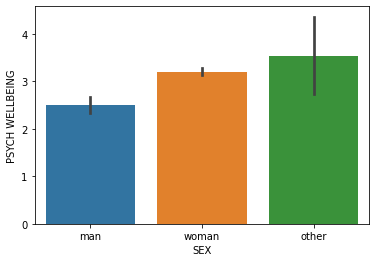

In [108]:
sns.barplot("SEX", "PSYCH WELLBEING", data = mental_health_data)

/Users/jasminehou/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SEX', ylabel='SOC FUNC AND COPING'>

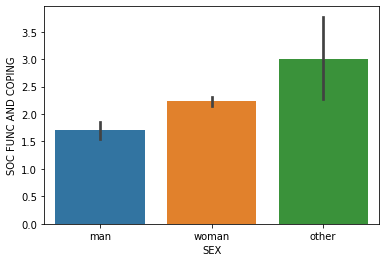

In [109]:
sns.barplot("SEX", "SOC FUNC AND COPING", data = mental_health_data)

/Users/jasminehou/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SEX', ylabel='K10'>

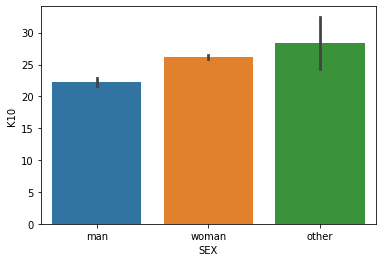

In [110]:
sns.barplot("SEX", "K10", data = mental_health_data)

/Users/jasminehou/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SEX', ylabel='BDI'>

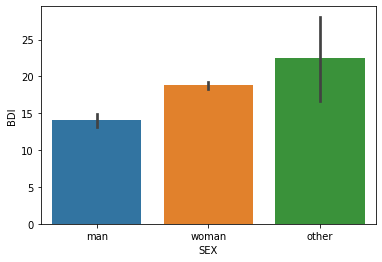

In [111]:
sns.barplot("SEX", "BDI", data = mental_health_data)

/Users/jasminehou/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SEX', ylabel='STAIR'>

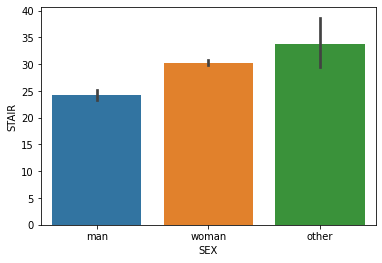

In [112]:
sns.barplot("SEX", "STAIR", data = mental_health_data)

/Users/jasminehou/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SEX', ylabel='YAACQ'>

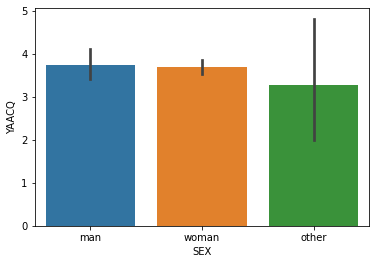

In [113]:
sns.barplot("SEX", "YAACQ", data = mental_health_data)

/Users/jasminehou/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SEX', ylabel='ISO'>

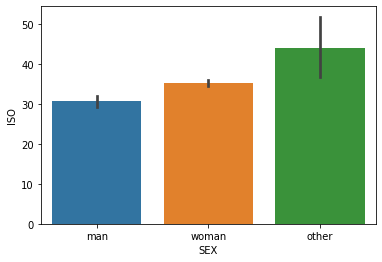

In [114]:
sns.barplot("SEX", "ISO", data = mental_health_data)

### Confirming statiscal significance

In [115]:
import scipy as scipy
from scipy import stats

# to make, well, some pretty tables
from prettytable import PrettyTable 

In [116]:
# in order to confirm statistical significance, I will perform a t-test for each indicator using men and women as 2 separate groups
# in doing so, we can get an idea of whether sex is associated with mental health state
# if the test returns a p-value <= 0.05, we deem the result as statistically significant

#making the table
rows = ["PSYCH WELLBEING","SOC FUNC AND COPING", "K10","BDI","STAIR","YAACQ","ISO"]
cols = ["indicator", "men_avg", "women_avg", "p_value", "statiscally sig.?"]

sex_table = PrettyTable(cols) 
sex_table.title = "Confirming Statistical Significance of Sex in Relation to Mental Health"

#iterate through each indicator
for ind in rows:
    
    #isolate indicator results for men/women
    woman_data = mental_health_data[mental_health_data.SEX == 'woman'][ind]
    man_data = mental_health_data[mental_health_data.SEX == 'man'][ind]
    
    #find p-value (perform t-test)
    p_value = stats.ttest_ind(woman_data, man_data)[1]
    
    #determine avg indicator result for men/women for reference
    men_avg = mental_health_data[mental_health_data.SEX == 'man'][ind].describe()['mean']
    women_avg = mental_health_data[mental_health_data.SEX == 'woman'][ind].describe()['mean']

    sex_table.add_row([ind, men_avg, women_avg, p_value, (p_value <= 0.05)])

print(sex_table)

+------------------------------------------------------------------------------------------------------------+
|                  Confirming Statistical Significance of Sex in Relation to Mental Health                   |
+---------------------+--------------------+--------------------+------------------------+-------------------+
|      indicator      |      men_avg       |     women_avg      |        p_value         | statiscally sig.? |
+---------------------+--------------------+--------------------+------------------------+-------------------+
|   PSYCH WELLBEING   | 2.4947145877378434 | 3.208485401459854  | 1.1952293270999587e-14 |        True       |
| SOC FUNC AND COPING | 1.7061310782241015 | 2.235857664233577  | 2.4821655866104077e-08 |        True       |
|         K10         | 22.26215644820296  | 26.175638686131386 | 6.358944977484344e-22  |        True       |
|         BDI         | 14.044397463002115 | 18.811131386861312 | 6.544004938768411e-18  |        True       |
|

### Insight
* Women generally have a higher (worse) mental health scores, with the exception being YAACQ. 
* YAACQ is the only mental health indicator with a p-value over 0.05 (not statiscally significant). 

Women generally having higher scores seems to suggest that they are more subject to poor mental health. The relationship between sex and mental health should be further analyzed with a more representative sample. Further study regarding men and women and their relations to alcohol-related consequences is also encouraged.

## Age vs. Mental Health
Next, let us examine the age buckets we created earlier and how they relate to mental health states. 

In [117]:
mental_health_data.AGE.describe()

count    2687.000000
mean       22.740231
std         3.635612
min        18.000000
25%        20.000000
50%        22.000000
75%        24.000000
max        39.000000
Name: AGE, dtype: float64

The mean age of the sample is 22.7 years, with the smallest age being 18 years and the largest age being 39 years. 

In [118]:
mental_health_data.groupby("age_bucket").size()

age_bucket
20.0    1491
25.0     928
30.0     196
35.0      65
40.0       7
dtype: int64

Note: "20.0" would indicate the age range of 15 years up to but not including 20 years (15-<20). 

<AxesSubplot:>

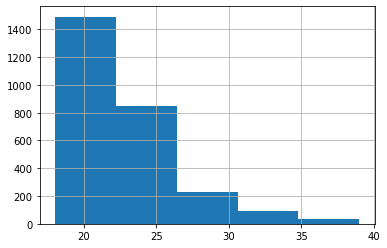

In [119]:
# a visual look at how many individuals landed in each age bucket
mental_health_data['AGE'].hist(bins=5)

### Graphing
Now let's graph each mental health indicator:

/Users/jasminehou/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age_bucket', ylabel='PSYCH WELLBEING'>

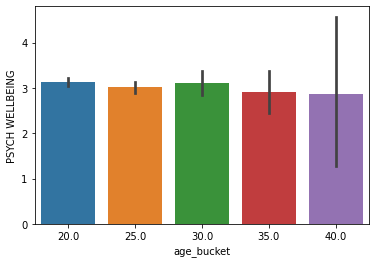

In [120]:
sns.barplot("age_bucket", "PSYCH WELLBEING", data = mental_health_data)

/Users/jasminehou/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age_bucket', ylabel='SOC FUNC AND COPING'>

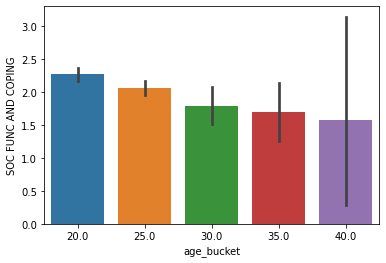

In [121]:
sns.barplot("age_bucket", "SOC FUNC AND COPING", data = mental_health_data)

/Users/jasminehou/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age_bucket', ylabel='K10'>

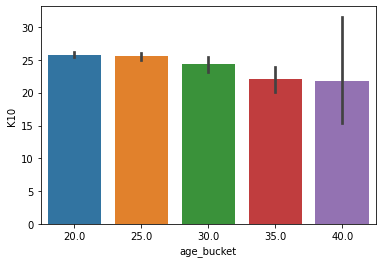

In [122]:
sns.barplot("age_bucket", "K10", data = mental_health_data)

/Users/jasminehou/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age_bucket', ylabel='BDI'>

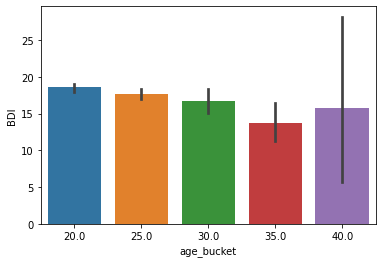

In [123]:
sns.barplot("age_bucket", "BDI", data = mental_health_data)

/Users/jasminehou/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age_bucket', ylabel='STAIR'>

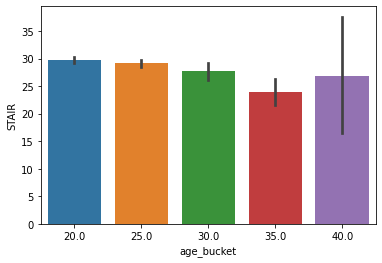

In [124]:
sns.barplot("age_bucket", "STAIR", data = mental_health_data)

/Users/jasminehou/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age_bucket', ylabel='YAACQ'>

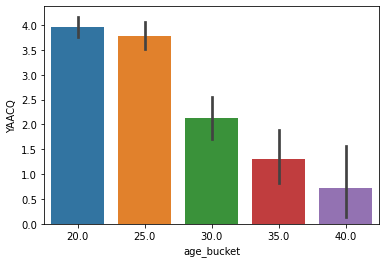

In [125]:
sns.barplot("age_bucket", "YAACQ", data = mental_health_data)

/Users/jasminehou/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age_bucket', ylabel='ISO'>

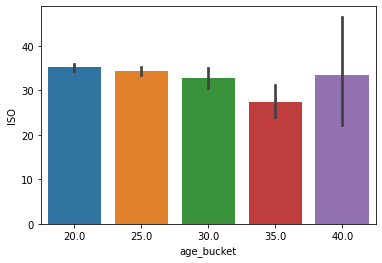

In [126]:
sns.barplot("age_bucket", "ISO", data =mental_health_data)

### Confirming statistical significance

In [127]:
# used to perform ANOVA test
from scipy.stats import f_oneway

In [128]:
# again let's perform some tests to confirm statistical significance, though this time we'll be using the ANOVA test as we have more than 2 groups to analyze.

# create the table
rows = ["PSYCH WELLBEING","SOC FUNC AND COPING", "K10","BDI","STAIR","YAACQ","ISO"]
cols = ["indicator", "p_value", "statiscally sig.?"]

age_table = PrettyTable(cols) 
age_table.title = "Confirming Statistical Significance of Age in Relation to Mental Health"

# interate through each indicator
for ind in rows:
    df1 = mental_health_data[mental_health_data.age_bucket == 20][ind]
    df2 = mental_health_data[mental_health_data.age_bucket == 25][ind]
    df3 = mental_health_data[mental_health_data.age_bucket == 30][ind]
    df4 = mental_health_data[mental_health_data.age_bucket == 35][ind]
    df5 = mental_health_data[mental_health_data.age_bucket == 40][ind]
    
    # perform ANOVA test
    p_value = f_oneway(df1, df2, df3, df4, df5)[1]
    
    age_table.add_row([ind, p_value, (p_value <= 0.05) ])
    
print(age_table)

+----------------------------------------------------------------------------+
|  Confirming Statistical Significance of Age in Relation to Mental Health   |
+------------------------+----------------------------+----------------------+
|       indicator        |          p_value           |  statiscally sig.?   |
+------------------------+----------------------------+----------------------+
|    PSYCH WELLBEING     |     0.5137397705018452     |        False         |
|  SOC FUNC AND COPING   |   0.0006180708711107649    |         True         |
|          K10           |   0.0006073476200010342    |         True         |
|          BDI           |   0.0019058574521855804    |         True         |
|         STAIR          |   0.00024357269429491326   |         True         |
|         YAACQ          |   2.2929881817995743e-14   |         True         |
|          ISO           |   0.0020870515096770965    |         True         |
+------------------------+--------------------------

### Insight
- According to the barplots, scores overall decreased over time with the exception of PSYCH WELLBEING (which remained generally constant) and ISO (which remained generally constant until a dip in the 30-35 year bucket).
- With the exception of PSYCH WELLBEING, all indicators had p-values <= 0.05 (statiscally significant).

From observation of the barplots, we can see that some confidence intervals do overlap. Even so, there are notable differences across the age groups and the ANOVA test we performed proves that results do seem to be statistically significant (with the exception of PSYCH WELLBEING). Further study with a more representative dataset is still encouraged. 

Scores generally decreasing over time suggests that mental health improves as a student ages. Younger age groups tending to have more severe mental health scores (especially in areas such as social functioning and coping and negative alcohol-related consequences) further emphasizes the importance of providing mental health resources in schools, community centers, and other settings in ways that can help support these younger demographics. 

## Region vs. Mental Health
Next, let us examine the four distinct regions of Argentina distinguished in the study and how they relate to mental health states. 

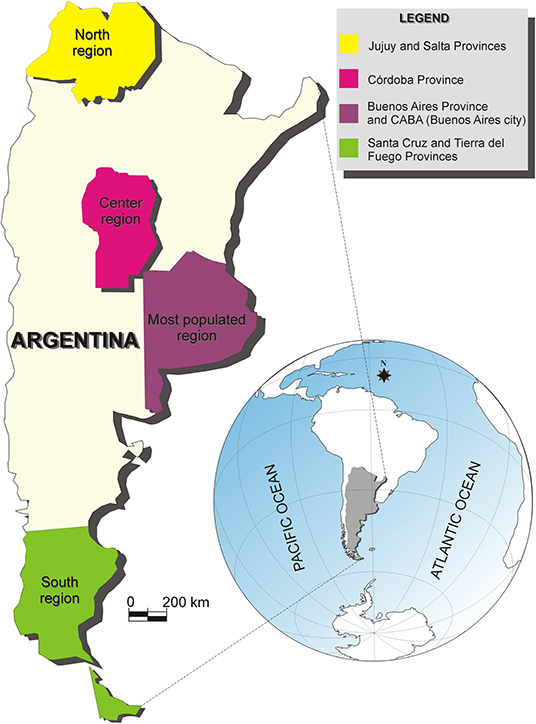

In [129]:
from IPython.display import Image
display(Image(filename='map.jpeg'))

The four distinct sub-regions are illustrated above: the North (Jujuy and Salta provinces), Center (Córdoba province), Most Populated (Buenos Aires [including both the Buenos Aires City (CABA) and the Buenos Aires Province]), and South region (Santa Cruz and Tierra del Fuego provinces). 

In [130]:
# a preliminary look at the counts per region
mental_health_data.groupby("REGIONS").size()

REGIONS
CENTER            1048
MOST POPULATED    1179
NORTH              371
SOUTH               89
dtype: int64

### Graphing
Now let's graph each mental health indicator:

/Users/jasminehou/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[(2.0, 3.5)]

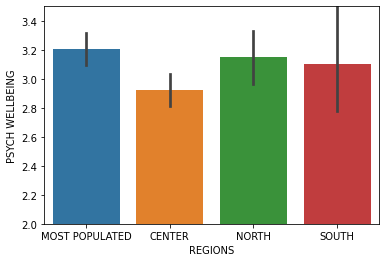

In [131]:
sns.barplot("REGIONS", "PSYCH WELLBEING", data = mental_health_data).set(ylim=(2, 3.5))

/Users/jasminehou/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[(1.4, 2.5)]

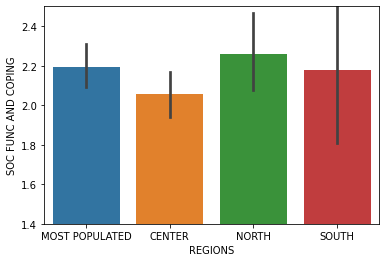

In [132]:
sns.barplot("REGIONS", "SOC FUNC AND COPING", data = mental_health_data).set(ylim=(1.4, 2.5))

/Users/jasminehou/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[(24.0, 27.0)]

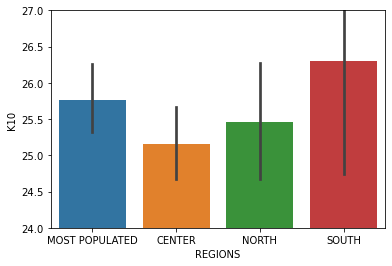

In [133]:
sns.barplot("REGIONS", "K10", data = mental_health_data).set(ylim=(24, 27))

/Users/jasminehou/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[(16.0, 20.0)]

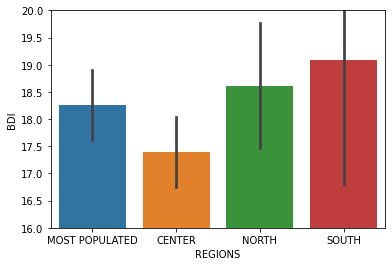

In [134]:
sns.barplot("REGIONS", "BDI", data = mental_health_data).set(ylim=(16, 20))

/Users/jasminehou/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[(28.0, 31.0)]

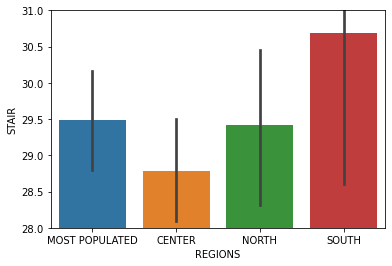

In [135]:
sns.barplot("REGIONS", "STAIR", data = mental_health_data).set(ylim=(28, 31))

/Users/jasminehou/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[(2.0, 5.0)]

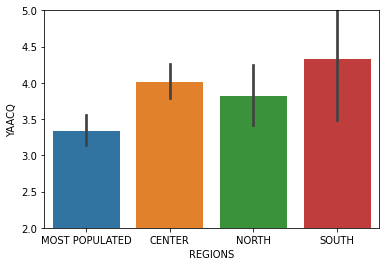

In [136]:
sns.barplot("REGIONS", "YAACQ", data = mental_health_data).set(ylim=(2, 5))

/Users/jasminehou/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[(30.0, 38.0)]

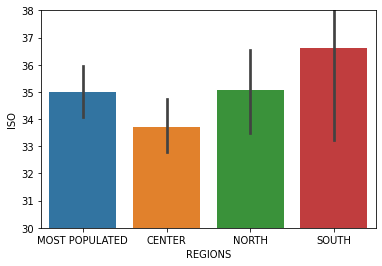

In [137]:
sns.barplot("REGIONS", "ISO", data = mental_health_data).set(ylim=(30, 38))

### Confirming statistical significance

In [138]:
# similar to age vs. mental health, we will be using the ANOVA test to confirm statitiscal significance

# create the table
rows = ["PSYCH WELLBEING","SOC FUNC AND COPING", "K10","BDI","STAIR","YAACQ","ISO"]
cols = ["indicator", "p_value", "statiscally sig.?"]

region_table = PrettyTable(cols) 
region_table.title = "Confirming Statistical Significance of Region in Relation to Mental Health"

# iterate through each indicator
for ind in rows:
    df1 = mental_health_data[mental_health_data.REGIONS == "MOST POPULATED"][ind]
    df2 = mental_health_data[mental_health_data.REGIONS == "NORTH"][ind]
    df3 = mental_health_data[mental_health_data.REGIONS == "SOUTH"][ind]
    df4 = mental_health_data[mental_health_data.REGIONS == "CENTER"][ind]
    
    # perform ANOVA test
    p_value = f_oneway(df1, df2, df3, df4)[1]
    
    region_table.add_row([ind, p_value, (p_value <= 0.05) ])
    
print(region_table)

+------------------------------------------------------------------------------+
|  Confirming Statistical Significance of Region in Relation to Mental Health  |
+-------------------------+----------------------------+-----------------------+
|        indicator        |          p_value           |   statiscally sig.?   |
+-------------------------+----------------------------+-----------------------+
|     PSYCH WELLBEING     |    0.003384405099785551    |          True         |
|   SOC FUNC AND COPING   |     0.2106759840628049     |         False         |
|           K10           |     0.2694781074450242     |         False         |
|           BDI           |    0.12094859442688348     |         False         |
|          STAIR          |     0.2940527174866622     |         False         |
|          YAACQ          |   0.00012521252182983675   |          True         |
|           ISO           |    0.14877674816471445     |         False         |
+-------------------------+-

### Insight
- With the exception of YAACQ, Center region had the lowest average score across the indicators.
- With the exception of PSYCH WELLBEING and SOC FUNC AND COPING, South region had the highest average score. Even among the exceptions, South region is close to the highest.
- With the exception of PSYCH WELLBEING and YAACQ, all indicators had a p-value > 0.05 (*not* statiscally significant).

From observation of the barplots, we can see that almost all the confidence intervals overlap each other. The exceptions are PSYCH WELLBEING and YAACQ, which had barplots with some non-overlap (no overlap between Most Populated and Center). This is consistent with the results from the p-value table, as PSYCH WELLBEING and YAACQ were the only two indicators that were deemed statistically significant. Though this dataset should not be used to make a strong conclusion regarding an association between region and mental health, patterns observed should be studied further with a more representative dataset. 

It should be considered that COVID-19 might have affected people in different regions differently, perhaps due to differences in COVID-19 severity as well as access to health resources. The Center region emcompasses the province of Córdoba, the second most populous city in Argentina that hosts a thriving tourist trade. Being located in the center of the country and the railway and highway hub of central Argentina, COVID-19 and mental health resources could easily be delivered to residents. This combined with results of lower mental health scores in the Center region suggests that access to resources may aid in improving the mental health of residents. In contrast, the South region emcompasses the Santa Cruz and Tierra del Fuego provinces. Santa Cruz is know for its glaciers and ever-shifting icy landscape, along with constant winds and dust storms. Tierra del Fuego is the southernmost, smallest, and least populous Argentine province with its current territory being inhabited by indigenous people for more than 12,000 years. It would make sense for the delivery of information and resources to these provinces to be comparatively more difficult than that of the Center region. This combined with results of higher mental health scores in the South region further suggests that the lack of access to resources may work towards declining mental health. 

These findings should encourage a reevaluation of how Argentina distributes its COVID-19 and mental health resources in order to aid all citizens across the country both physically and mentally. 

## Sub-Period & Region vs. Mental Health
FInally, let us examine the four distinct regions and how they relate to mental health states over time. 

In [139]:
mental_health_data.groupby("SUB PERIODS IN PRE AND POST").size()

SUB PERIODS IN PRE AND POST
1. ONE WEEK PRE            1508
2. TWO WEEK PRE             525
3. ONE WEEK POST            364
4. REMAINING WEEKS POST     290
dtype: int64

As mentioned before, this dataset contains survey results collected over four quarantine sub-periods (twice prior, and twice following the first quarantine extension in Argentina). Here is each sub-period with their corresponding dates: 
* 17–23 March 2020 --> ONE WEEK PRE
* 24–29 March 2020 --> TWO WEEK PRE
* 30 March to 05 April 2020 --> ONE WEEK POST
* 06–29 April 2020 --> REMAINING WEEKS POST




### Graphing
Let's graph each mental health indicator and display a table showcasing net and percent increase:

/Users/jasminehou/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SUB PERIODS IN PRE AND POST', ylabel='PSYCH WELLBEING'>

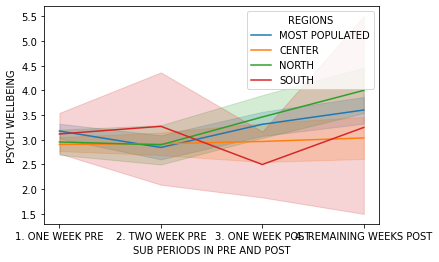

In [140]:
sns.lineplot("SUB PERIODS IN PRE AND POST", "PSYCH WELLBEING", hue='REGIONS', 
             data=mental_health_data)

Let's make the table: (this process will be repeated for each indicator)

In [141]:
# isolate the columns of interest
filtered = mental_health_data[["SUB PERIODS IN PRE AND POST", "REGIONS", "PSYCH WELLBEING"]]

new = pd.crosstab(filtered['REGIONS'], filtered['SUB PERIODS IN PRE AND POST'], filtered["PSYCH WELLBEING"], aggfunc = np.mean)

# create the table
rows = ["MOST POPULATED", "CENTER", "NORTH", "SOUTH"]
cols = ["region", "% increase", "net increase"]

table = PrettyTable(cols) 
table.title = "Psych Wellbeing Analyzed by Region & Sub-Period"

# iterate through each region
for region in rows:
    net_inc = new.loc[region, '4. REMAINING WEEKS POST'] - new.loc[region, '1. ONE WEEK PRE']
    perc_inc = net_inc / new.loc[region, '1. ONE WEEK PRE']
    table.add_row([region, perc_inc, net_inc])

print(table)

+-------------------------------------------------------------+
|       Psych Wellbeing Analyzed by Region & Sub-Period       |
+----------------+----------------------+---------------------+
|     region     |      % increase      |     net increase    |
+----------------+----------------------+---------------------+
| MOST POPULATED | 0.13369963369963375  |  0.4248581251812271 |
|     CENTER     | 0.04516129032258068  |  0.1312500000000001 |
|     NORTH      | 0.35327102803738314  |  1.0441988950276242 |
|     SOUTH      | 0.042452830188679236 | 0.13235294117647056 |
+----------------+----------------------+---------------------+


/Users/jasminehou/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SUB PERIODS IN PRE AND POST', ylabel='SOC FUNC AND COPING'>

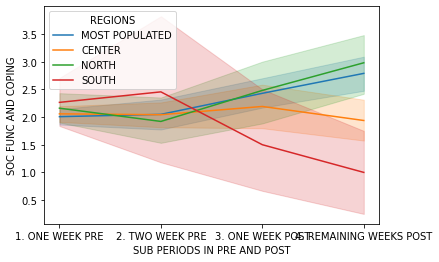

In [142]:
sns.lineplot("SUB PERIODS IN PRE AND POST", "SOC FUNC AND COPING", hue='REGIONS', 
             data=mental_health_data)

In [143]:
filtered = mental_health_data[["SUB PERIODS IN PRE AND POST", "REGIONS", "SOC FUNC AND COPING"]]
new = pd.crosstab(filtered['REGIONS'], filtered['SUB PERIODS IN PRE AND POST'], filtered["SOC FUNC AND COPING"], aggfunc = np.mean)

rows = ["MOST POPULATED", "CENTER", "NORTH", "SOUTH"]
cols = ["region", "% increase", "net increase"]

table = PrettyTable(cols) 
table.title = "Soc. Func. and Coping Analyzed by Region & Sub-Period"

for region in rows:
    net_inc = new.loc[region, '4. REMAINING WEEKS POST'] - new.loc[region, '1. ONE WEEK PRE']
    perc_inc = net_inc / new.loc[region, '1. ONE WEEK PRE']
    table.add_row([region, perc_inc, net_inc])

print(table)

+--------------------------------------------------------------+
|    Soc. Func. and Coping Analyzed by Region & Sub-Period     |
+----------------+----------------------+----------------------+
|     region     |      % increase      |     net increase     |
+----------------+----------------------+----------------------+
| MOST POPULATED | 0.38974049300136265  |  0.781999502920343   |
|     CENTER     | -0.05846621108580098 | -0.12031249999999982 |
|     NORTH      |  0.3794884910485934  |  0.8197790055248619  |
|     SOUTH      | -0.5584415584415584  | -1.2647058823529411  |
+----------------+----------------------+----------------------+


/Users/jasminehou/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SUB PERIODS IN PRE AND POST', ylabel='K10'>

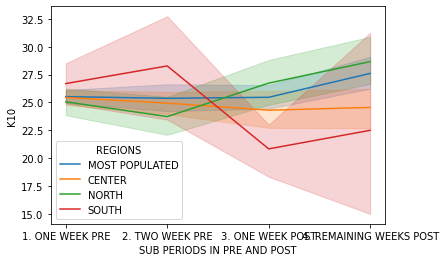

In [144]:
sns.lineplot("SUB PERIODS IN PRE AND POST", "K10", hue='REGIONS', 
             data=mental_health_data)

In [145]:
filtered = mental_health_data[["SUB PERIODS IN PRE AND POST", "REGIONS", "K10"]]
new = pd.crosstab(filtered['REGIONS'], filtered['SUB PERIODS IN PRE AND POST'], filtered["K10"], aggfunc = np.mean)

rows = ["MOST POPULATED", "CENTER", "NORTH", "SOUTH"]
cols = ["region", "% increase", "net increase"]

table = PrettyTable(cols) 
table.title = "K10 Analyzed by Region & Sub-Period"

for region in rows:
    net_inc = new.loc[region, '4. REMAINING WEEKS POST'] - new.loc[region, '1. ONE WEEK PRE']
    perc_inc = net_inc / new.loc[region, '1. ONE WEEK PRE']
    table.add_row([region, perc_inc, net_inc])

print(table)

+-------------------------------------------------------------+
|             K10 Analyzed by Region & Sub-Period             |
+----------------+----------------------+---------------------+
|     region     |      % increase      |     net increase    |
+----------------+----------------------+---------------------+
| MOST POPULATED | 0.08152849597969236  |  2.0807547326125686 |
|     CENTER     | -0.03506724805011356 | -0.8921874999999986 |
|     NORTH      | 0.14387210584343985  |  3.6047513812154683 |
|     SOUTH      | -0.15702479338842976 | -4.1911764705882355 |
+----------------+----------------------+---------------------+


/Users/jasminehou/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SUB PERIODS IN PRE AND POST', ylabel='BDI'>

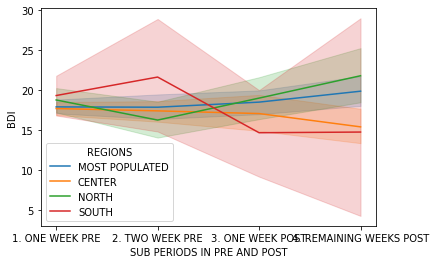

In [146]:
sns.lineplot("SUB PERIODS IN PRE AND POST", "BDI", hue='REGIONS', 
             data=mental_health_data)

In [147]:
filtered = mental_health_data[["SUB PERIODS IN PRE AND POST", "REGIONS", "BDI"]]
new = pd.crosstab(filtered['REGIONS'], filtered['SUB PERIODS IN PRE AND POST'], filtered["BDI"], aggfunc = np.mean)

rows = ["MOST POPULATED", "CENTER", "NORTH", "SOUTH"]
cols = ["region", "% increase", "net increase"]

table = PrettyTable(cols) 
table.title = "BDI Analyzed by Region & Sub-Period"

for region in rows:
    net_inc = new.loc[region, '4. REMAINING WEEKS POST'] - new.loc[region, '1. ONE WEEK PRE']
    perc_inc = net_inc / new.loc[region, '1. ONE WEEK PRE']
    table.add_row([region, perc_inc, net_inc])

print(table)

+-------------------------------------------------------------+
|             BDI Analyzed by Region & Sub-Period             |
+----------------+----------------------+---------------------+
|     region     |      % increase      |     net increase    |
+----------------+----------------------+---------------------+
| MOST POPULATED | 0.10980803943349074  |  1.9655461662731462 |
|     CENTER     | -0.12971302428256068 | -2.2953124999999996 |
|     NORTH      | 0.16155431262879022  |  3.0320441988950293 |
|     SOUTH      | -0.2366818873668189  | -4.5735294117647065 |
+----------------+----------------------+---------------------+


/Users/jasminehou/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SUB PERIODS IN PRE AND POST', ylabel='STAIR'>

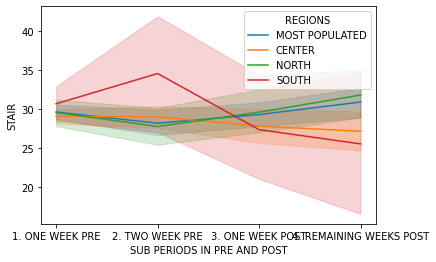

In [148]:
sns.lineplot("SUB PERIODS IN PRE AND POST", "STAIR", hue='REGIONS', 
             data=mental_health_data)

In [149]:
filtered = mental_health_data[["SUB PERIODS IN PRE AND POST", "REGIONS", "STAIR"]]
new = pd.crosstab(filtered['REGIONS'], filtered['SUB PERIODS IN PRE AND POST'], filtered["STAIR"], aggfunc = np.mean)

rows = ["MOST POPULATED", "CENTER", "NORTH", "SOUTH"]
cols = ["region", "% increase", "net increase"]

table = PrettyTable(cols) 
table.title = "STAIR Analyzed by Region & Sub-Period"

for region in rows:
    net_inc = new.loc[region, '4. REMAINING WEEKS POST'] - new.loc[region, '1. ONE WEEK PRE']
    perc_inc = net_inc / new.loc[region, '1. ONE WEEK PRE']
    table.add_row([region, perc_inc, net_inc])

print(table)

+-------------------------------------------------------------+
|            STAIR Analyzed by Region & Sub-Period            |
+----------------+----------------------+---------------------+
|     region     |      % increase      |     net increase    |
+----------------+----------------------+---------------------+
| MOST POPULATED | 0.04319420075722591  |  1.278799552628307  |
|     CENTER     | -0.06729735540743928 | -1.9562500000000007 |
|     NORTH      | 0.07617960710944817  |  2.249613259668511  |
|     SOUTH      | -0.16834532374100716 | -5.1617647058823515 |
+----------------+----------------------+---------------------+


/Users/jasminehou/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SUB PERIODS IN PRE AND POST', ylabel='YAACQ'>

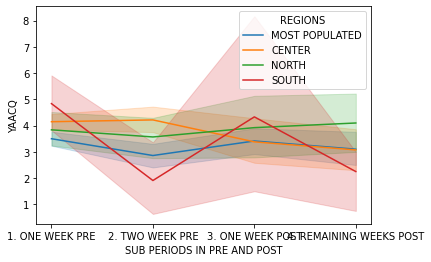

In [150]:
sns.lineplot("SUB PERIODS IN PRE AND POST", "YAACQ", hue='REGIONS', 
             data=mental_health_data)

In [151]:
filtered = mental_health_data[["SUB PERIODS IN PRE AND POST", "REGIONS", "YAACQ"]]
new = pd.crosstab(filtered['REGIONS'], filtered['SUB PERIODS IN PRE AND POST'], filtered["YAACQ"], aggfunc = np.mean)

rows = ["MOST POPULATED", "CENTER", "NORTH", "SOUTH"]
cols = ["region", "% increase", "net increase"]

table = PrettyTable(cols) 
table.title = "YAACQ Analyzed by Region & Sub-Period"

for region in rows:
    net_inc = new.loc[region, '4. REMAINING WEEKS POST'] - new.loc[region, '1. ONE WEEK PRE']
    perc_inc = net_inc / new.loc[region, '1. ONE WEEK PRE']
    table.add_row([region, perc_inc, net_inc])

print(table)

+-------------------------------------------------------------+
|            YAACQ Analyzed by Region & Sub-Period            |
+----------------+----------------------+---------------------+
|     region     |      % increase      |     net increase    |
+----------------+----------------------+---------------------+
| MOST POPULATED | -0.11375764675257054 | -0.3982436518785466 |
|     CENTER     | -0.2587570621468926  | -1.0734374999999998 |
|     NORTH      | 0.06776978417266176  |  0.2602209944751377 |
|     SOUTH      | -0.5349544072948328  | -2.5882352941176467 |
+----------------+----------------------+---------------------+


/Users/jasminehou/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SUB PERIODS IN PRE AND POST', ylabel='ISO'>

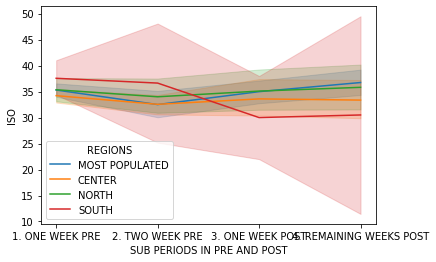

In [152]:
sns.lineplot("SUB PERIODS IN PRE AND POST", "ISO", hue='REGIONS', 
             data=mental_health_data)

In [153]:
filtered = mental_health_data[["SUB PERIODS IN PRE AND POST", "REGIONS", "ISO"]]
new = pd.crosstab(filtered['REGIONS'], filtered['SUB PERIODS IN PRE AND POST'], filtered["ISO"], aggfunc = np.mean)

rows = ["MOST POPULATED", "CENTER", "NORTH", "SOUTH"]
cols = ["region", "% increase", "net increase"]

table = PrettyTable(cols) 
table.title = "ISO Analyzed by Region & Sub-Period"

for region in rows:
    net_inc = new.loc[region, '4. REMAINING WEEKS POST'] - new.loc[region, '1. ONE WEEK PRE']
    perc_inc = net_inc / new.loc[region, '1. ONE WEEK PRE']
    table.add_row([region, perc_inc, net_inc])

print(table)

+-------------------------------------------------------------+
|             ISO Analyzed by Region & Sub-Period             |
+----------------+----------------------+---------------------+
|     region     |      % increase      |     net increase    |
+----------------+----------------------+---------------------+
| MOST POPULATED | 0.040832969580910275 |  1.4414895820388551 |
|     CENTER     | -0.0249337839072063  | -0.8531250000000057 |
|     NORTH      | 0.013192686357243353 |  0.4664088397790067 |
|     SOUTH      | -0.18794048551292097 |  -7.058823529411768 |
+----------------+----------------------+---------------------+


### Insight
* With exception of YAACQ, Most Populated region and North region generally increased in mental health score with time.
* Center region generally remained constant.
* Confidence interval of South region (shaded red on graphs) is too large to confidently make a conclusion.

Further study with a more representative sample is encouraged. 

# Dataset #2 and EDA

To provide more insight into possible relationships between the progression of COVID-19 and changes in mental health state, I decided to incorporate a second dataset. 

This data is provided by Our World of Data, a scientific online publication that compiled data from specialized institutes (i.e. the Peace Research Institute Oslo), research articles, and international institutions or statistical agencies (i.e. OECD, the World Bank) into a dataset containing numerous variables relating to the current state of COVID-19 in several countries. This dataset is updated daily; I will be using data as of August 13th, 2021. The dataset can be found here: https://ourworldindata.org/coronavirus/country/argentina. 

Let's take a look at what this dataset has to offer.

---


In [154]:
# read in data
covid_data = pd.read_excel("covid-data.xlsx") 

In [155]:
# importing library used to create "datetime" object (helps with graphing)
from datetime import *

In [156]:
# creating new column to store our new "datetime" objects
covid_data['new_date'] = pd.to_datetime(covid_data.date.apply(lambda x: datetime.strptime(x , '%Y-%m-%d')))


# again for reference, sub-periods from the 1st dataset and their corresponding dates:

# 17–23 March 2020 --> ONE WEEK PRE
# 24–29 March 2020 --> TWO WEEK PRE
# 30 March to 05 April 2020 --> ONE WEEK POST
# 06–29 April 2020 --> REMAINING WEEKS POST

# filtering covid_data to match timeframe of 1st dataset
start_date = pd.to_datetime(date(2020, 3, 17))
end_date = pd.to_datetime(date(2020, 4, 29))
covid_data = covid_data[(covid_data.new_date >= start_date) & (covid_data.new_date <= end_date)]

# filtering covid_data to only include data from Argentina
covid_data = covid_data[(covid_data.location == "Argentina")]

In [157]:
covid_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality,new_date
3789,ARG,South America,Argentina,2020-03-17,68.0,12.0,7.286,2.0,0.0,0.143,...,191.032,5.5,16.2,27.7,NaN,5.0,76.67,0.845,NaN,2020-03-17
3790,ARG,South America,Argentina,2020-03-18,79.0,11.0,8.571,2.0,0.0,0.143,...,191.032,5.5,16.2,27.7,NaN,5.0,76.67,0.845,NaN,2020-03-18
3791,ARG,South America,Argentina,2020-03-19,97.0,18.0,11.143,3.0,1.0,0.286,...,191.032,5.5,16.2,27.7,NaN,5.0,76.67,0.845,NaN,2020-03-19
3792,ARG,South America,Argentina,2020-03-20,128.0,31.0,13.857,3.0,0.0,0.143,...,191.032,5.5,16.2,27.7,NaN,5.0,76.67,0.845,NaN,2020-03-20
3793,ARG,South America,Argentina,2020-03-21,158.0,30.0,17.714,4.0,1.0,0.286,...,191.032,5.5,16.2,27.7,NaN,5.0,76.67,0.845,NaN,2020-03-21


# Approach and sub-questions
Clearly, there are dozens of note-worthy variables to investigate from this dataset. But for simplicity of analysis, I will primarily be focusing on "new cases" and "total cases."

In order to target our research questions, I will combine this dataset with our previous one and observe any potential relationships between the progression of COVID-19 in Argentina and changes in mental health. In doing so, we can answer the question : **Has the mental health of students been impacted by COVID-19?** and **If so, to what extent? (positively, negatively, etc.)**. 

I determined that the best way to approach this problem is to analyze our variables of interest (total cases, new cases) and their relationship to the mental health indicators. The comparisons are as follows:

* Total Cases vs. Mental Health
* Sub-Period vs. Mental Health comparded to Sub-Period vs. New Cases

Let's go ahead and combine the datasets.

## Merging the two datasets

In [158]:
# function used to assign a given date to a sub-period outlined in the 1st dataset
def assign_period(day):
    sub_period = ""
    if (day >= date(2020, 3, 17)) & (day < date(2020, 3, 23)):
        sub_period = "1. ONE WEEK PRE"
    if (day >= date(2020, 3, 24)) & (day < date(2020, 3, 29)):
        sub_period = "2. TWO WEEK PRE"
    if (day >= date(2020, 3, 30)) & (day < date(2020, 4, 5)):
        sub_period = "3. ONE WEEK POST"
    if (day >= date(2020, 4, 5)) & (day < date(2020, 4, 29)):
        sub_period = "4. REMAINING WEEKS POST"
    return sub_period

covid_data["SUB PERIODS IN PRE AND POST"] = covid_data.new_date.apply(lambda x: assign_period(x))

In [159]:
# use merge() to combine the 2 datasets using "SUB PERIODS IN PRE AND POST" as the common column
combine_data = covid_data.merge(mental_health_data, how="inner", on="SUB PERIODS IN PRE AND POST")

combine_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,SEX,AGE,PSYCH WELLBEING,SOC FUNC AND COPING,K10,BDI,STAIR,YAACQ,ISO,age_bucket
0,ARG,South America,Argentina,2020-03-17,68.0,12.0,7.286,2.0,0.0,0.143,...,man,32,6,4,40,40,42,0,44,30.0
1,ARG,South America,Argentina,2020-03-17,68.0,12.0,7.286,2.0,0.0,0.143,...,man,26,2,1,24,11,18,3,19,25.0
2,ARG,South America,Argentina,2020-03-17,68.0,12.0,7.286,2.0,0.0,0.143,...,woman,30,3,0,21,11,11,6,17,30.0
3,ARG,South America,Argentina,2020-03-17,68.0,12.0,7.286,2.0,0.0,0.143,...,woman,21,4,0,23,15,27,0,22,20.0
4,ARG,South America,Argentina,2020-03-17,68.0,12.0,7.286,2.0,0.0,0.143,...,woman,20,0,0,13,4,9,4,18,20.0


Sucess! The two datasets are now combined. Let's move on to graphing. 

## Total Cases vs. Mental Health
Let's first start with examining the total cases (cumulative) of COVID-19 in Argentina and how they may relate to changes in mental health state.

Let's look at the change in total cases over time:

/Users/jasminehou/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='new_date', ylabel='total_cases'>

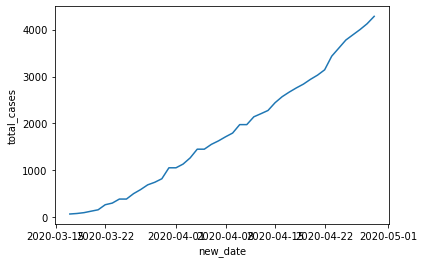

In [160]:
sns.lineplot("new_date", "total_cases", data=covid_data)

Total cases seem to increase overall over time; COVID-19 seemed to be getting worse in Argentina as time progressed.

### Graphing
Let's graph "total_cases" of COVID-19 by each mental health indicator:

/Users/jasminehou/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_cases', ylabel='PSYCH WELLBEING'>

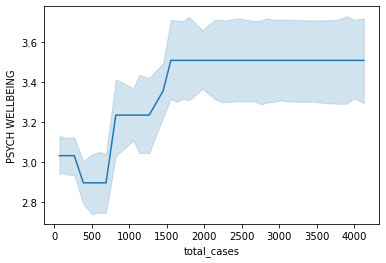

In [161]:
sns.lineplot("total_cases", "PSYCH WELLBEING", data=combine_data)

/Users/jasminehou/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_cases', ylabel='SOC FUNC AND COPING'>

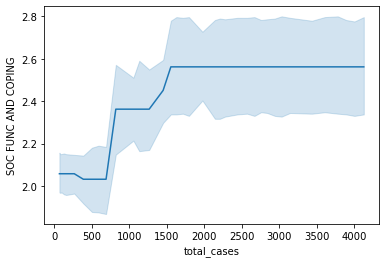

In [162]:
sns.lineplot("total_cases", "SOC FUNC AND COPING", data=combine_data)

/Users/jasminehou/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_cases', ylabel='K10'>

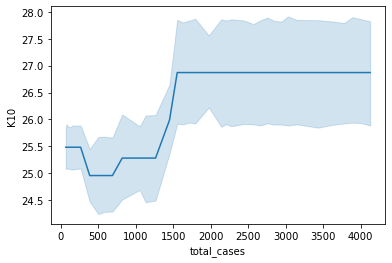

In [163]:
sns.lineplot("total_cases", "K10", data=combine_data)

/Users/jasminehou/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_cases', ylabel='BDI'>

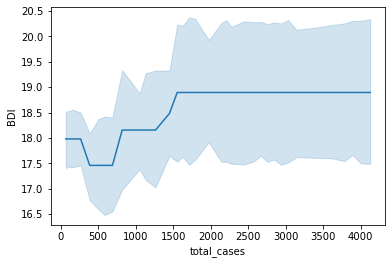

In [164]:
sns.lineplot("total_cases", "BDI", data=combine_data)

/Users/jasminehou/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_cases', ylabel='STAIR'>

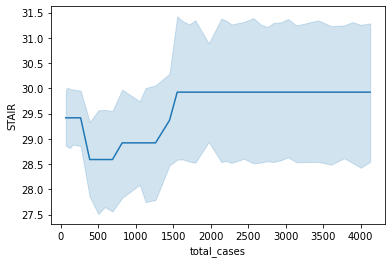

In [165]:
sns.lineplot("total_cases", "STAIR", data=combine_data)

/Users/jasminehou/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_cases', ylabel='YAACQ'>

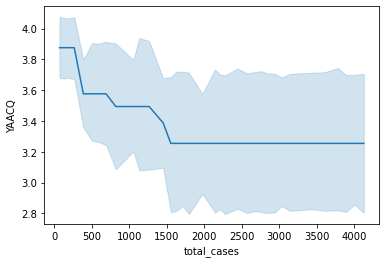

In [166]:
sns.lineplot("total_cases", "YAACQ", data=combine_data)

/Users/jasminehou/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_cases', ylabel='ISO'>

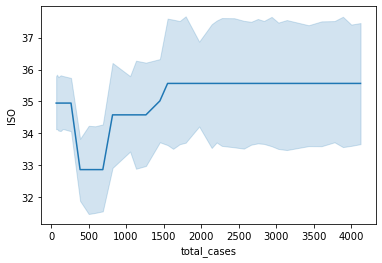

In [167]:
sns.lineplot("total_cases", "ISO", data=combine_data)

### Insight
* With the exception of YAACQ, all mental health scores generally increase as total cases increase.

Though the relationship may be weak, there seems to be an association between mental health indicators and total cases. As total cases rose with time, scores got progressively worse, suggesting that the increase in total cases may have negatively influenced mental health of Argentinean citizens. Further study regarding YAACQ should be pursued.

## Sub-Period vs. Mental Health compared to Sub-Period vs. New Cases

Next, let's do a comparison between the graphs of mental health scores by quarantine sub-period and the change in new cases over time. 

### Graphing (pt.1)
First let's graph the change in mental health scores over time for each indicator.

/Users/jasminehou/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SUB PERIODS IN PRE AND POST', ylabel='PSYCH WELLBEING'>

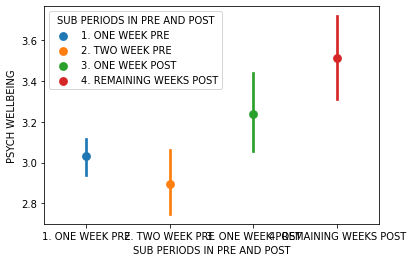

In [168]:
sns.pointplot("SUB PERIODS IN PRE AND POST", "PSYCH WELLBEING",
             data=mental_health_data, hue = "SUB PERIODS IN PRE AND POST")

/Users/jasminehou/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SUB PERIODS IN PRE AND POST', ylabel='SOC FUNC AND COPING'>

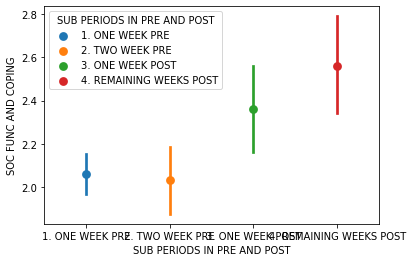

In [169]:
sns.pointplot("SUB PERIODS IN PRE AND POST", "SOC FUNC AND COPING",
             data=mental_health_data, hue = "SUB PERIODS IN PRE AND POST")

/Users/jasminehou/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SUB PERIODS IN PRE AND POST', ylabel='K10'>

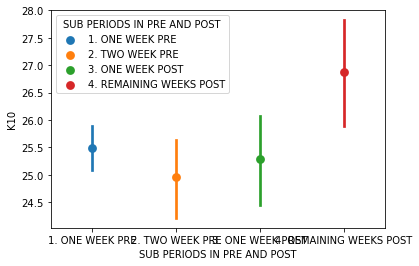

In [170]:
sns.pointplot("SUB PERIODS IN PRE AND POST", "K10",
             data=mental_health_data, hue = "SUB PERIODS IN PRE AND POST")

/Users/jasminehou/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SUB PERIODS IN PRE AND POST', ylabel='BDI'>

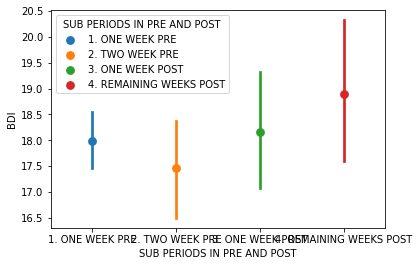

In [171]:
sns.pointplot("SUB PERIODS IN PRE AND POST", "BDI",
             data=mental_health_data, hue = "SUB PERIODS IN PRE AND POST")

/Users/jasminehou/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SUB PERIODS IN PRE AND POST', ylabel='STAIR'>

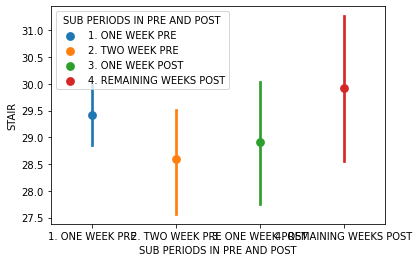

In [172]:
sns.pointplot("SUB PERIODS IN PRE AND POST", "STAIR",
             data=mental_health_data, hue = "SUB PERIODS IN PRE AND POST")

/Users/jasminehou/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SUB PERIODS IN PRE AND POST', ylabel='YAACQ'>

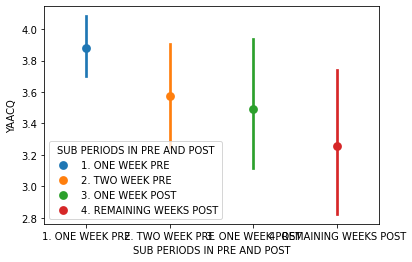

In [173]:
sns.pointplot("SUB PERIODS IN PRE AND POST", "YAACQ",
             data=mental_health_data, hue = "SUB PERIODS IN PRE AND POST")

/Users/jasminehou/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SUB PERIODS IN PRE AND POST', ylabel='ISO'>

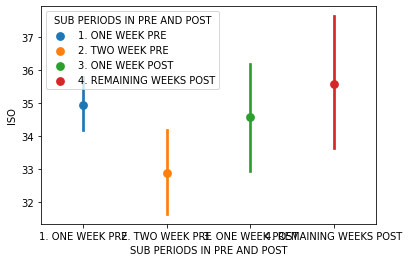

In [174]:
sns.pointplot("SUB PERIODS IN PRE AND POST", "ISO",
             data=mental_health_data, hue = "SUB PERIODS IN PRE AND POST")

### Graphing (pt.2)

Now let's graph the change in new cases over time in Argentina.

In [175]:
import matplotlib.pyplot as plt

/Users/jasminehou/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


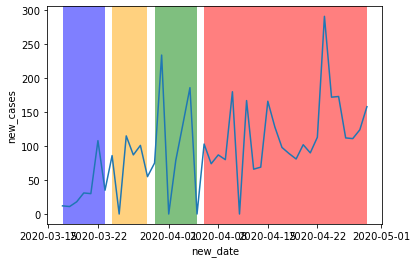

In [176]:
sns.lineplot("new_date", "new_cases", data=covid_data)
plt.axvspan(pd.to_datetime(date(2020, 3, 17)), pd.to_datetime(date(2020, 3, 23)), alpha = 0.5, facecolor='b')
plt.axvspan(pd.to_datetime(date(2020, 3, 24)), pd.to_datetime(date(2020, 3, 29)), alpha = 0.5, facecolor='orange')
plt.axvspan(pd.to_datetime(date(2020, 3, 30)), pd.to_datetime(date(2020, 4, 5)), alpha = 0.5, facecolor='g')
plt.axvspan(pd.to_datetime(date(2020, 4, 6)), pd.to_datetime(date(2020, 4, 29)), alpha = 0.5, facecolor='r')

Blue indicates the "ONE WEEK PRE" sub-period (17–23 March 2020), orange indicates the "TWO WEEK PRE" sub-period (24–29 March 2020), green indicates the "ONE WEEK POST" sub-period (30 March to 05 April 2020), and red indicates the "REMAINING WEEKS POST" sub-period (06–29 April 2020). 

### Insight
- With the exception of YAACQ, all mental health scores decreased with time until 24–29 March 2020 (TWO WEEK PRE), and then increased with time. 
- The number of new cases generally increased over time.

The pattern observed in the mental health point plots could be rationlized as such:
1. **ONE WEEK PRE**: Start point for comparison. 
2. **TWO WEEK PRE**: New cases increase steadily, though at this point, it was probably not out of the norm. Citizens may be becoming accustomed and calming down, helping to explain the decrease in mental health scores (overall improvement in mental health). 
3. **ONE WEEK POST**: Argentina experiences drastic spikes in new cases. This may cause panic amongst citizens, which may explain the increase in mental health scores (overall decline in mental health). 
4. **REMAINING WEEKS POST**: Spikes continue and new cases continue to rise. Panic may continue and mental health scores continue to increase.

It should be noted that analysis is limited due to only have 4 sub-periods of data. Future research using more time periods is encouraged. 

# Findings

Our original questions were: 
1. What factors may affect mental health in students?
2. Has the mental health of students been impacted by COVID-19?
3. If so, to what extent? (positively, negatively, etc.)

Let's go ahead and break these down. 

---

**1. What factors may affect mental health in students?**

We have established several variables of interest, including sex, age, region, and sub-period. Here is what my analysis suggests:
- Women are more subject to worse mental health than men.
- Younger age groups tend to have more severe mental health scores.
- Regions in Argentina with easier access to COVID-19 and mental health resources tend to have better mental health scores.

**2. Has the mental health of students been impacted by COVID-19?**

Short answer is, analysis shows yes. 

**3. If so, to what extent? (positively, negatively, etc.)**

Our analysis suggests that the increase in total cases of COVID-19 in Argentina may have negatively influenced mental health of Argentinean citizens. A rise in panic from spikes in new cases also seem to negatively influence mental health. 

---

As a final note, there were several limitations in this study, including samples that were not fully representative (i.e. large differences in counts among men, women, and "other" and large confidence intervals in numerous plots) that led to data not being statistically significant enough to make a strong conclusion. Having only 4 quarantine sub-periods for analysis also limited possible hypotheses. I encourage further study using a larger sample size that better represents our target population of Argentean students over longer periods of time, as well as more research into variables that frequently demonstrated deviations from others (i.e. YAACQ). 

# Appendix

Here is an additional analysis performed using the second dataset. Though the graphs exhibited a common pattern, I was suspicious as to whether the flunctuations in scores were actually due to changes in new cases. Additional analysis into possible discrepancies in the dataset is encouraged. 

## New Cases vs. Mental Health
Let's first start with examining new cases of COVID-19 and how they may relate to changes in mental health state.

### Graphing
Let's graph "new_cases" by each mental health indicator:

/Users/jasminehou/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='new_cases', ylabel='PSYCH WELLBEING'>

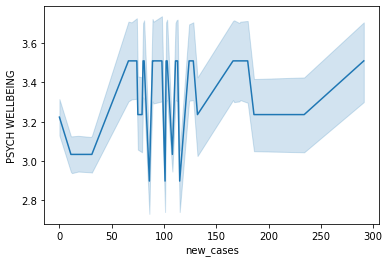

In [177]:
sns.lineplot("new_cases", "PSYCH WELLBEING", data=combine_data)

/Users/jasminehou/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='new_cases', ylabel='SOC FUNC AND COPING'>

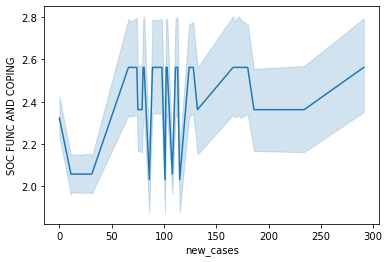

In [178]:
sns.lineplot("new_cases", "SOC FUNC AND COPING", data=combine_data)

/Users/jasminehou/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='new_cases', ylabel='K10'>

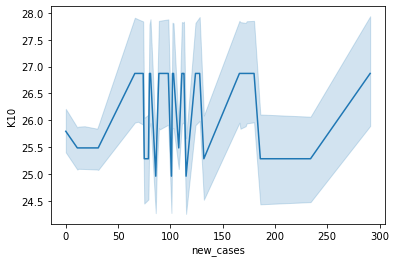

In [179]:
sns.lineplot("new_cases", "K10", data=combine_data)

/Users/jasminehou/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='new_cases', ylabel='BDI'>

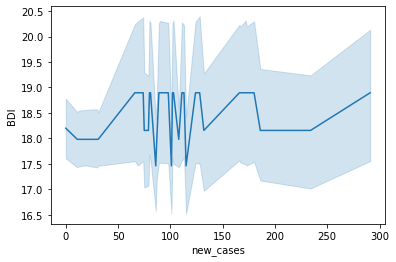

In [180]:
sns.lineplot("new_cases", "BDI", data=combine_data)

/Users/jasminehou/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='new_cases', ylabel='STAIR'>

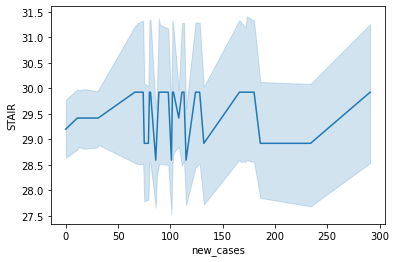

In [181]:
sns.lineplot("new_cases", "STAIR", data=combine_data)

/Users/jasminehou/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='new_cases', ylabel='YAACQ'>

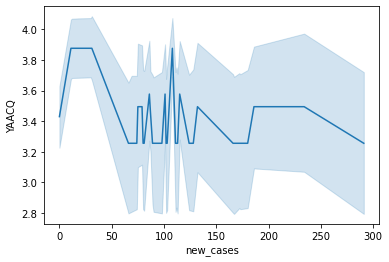

In [182]:
sns.lineplot("new_cases", "YAACQ", data=combine_data)

/Users/jasminehou/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='new_cases', ylabel='ISO'>

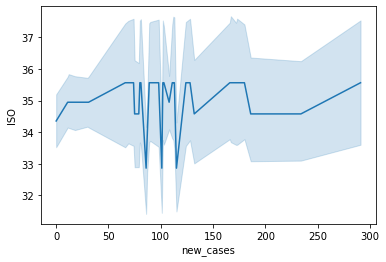

In [183]:
sns.lineplot("new_cases", "ISO", data=combine_data)

### Insight
* With the exception of YAACQ, all mental health scores generally increase as new cases increases until the 100 new cases mark, flunctuates, and then generally increases. 